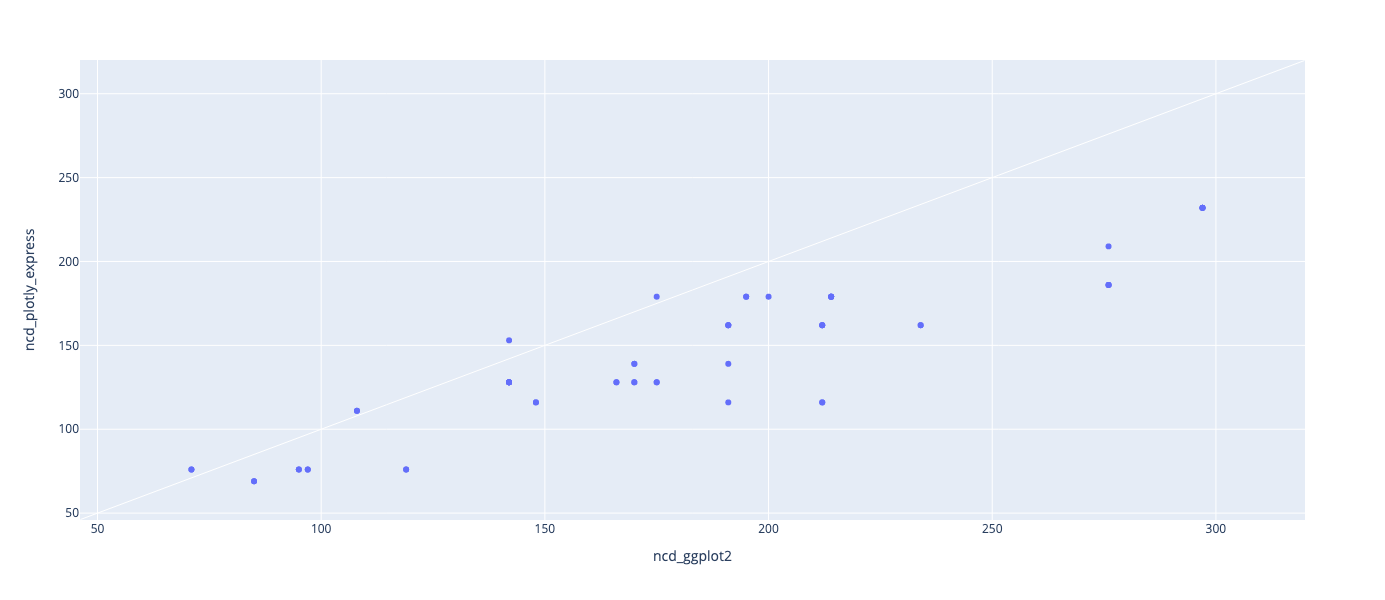

In [74]:
from src.distances import load_distances
import plotly.express as px


df = load_distances()

notation1 = "ggplot2"
notation2 = "plotly_express"
distance1 = "ncd"
distance2 = "ncd"

merged = pd.merge(df.query(f"study=='basic' and notation=='{notation1}'")[["from_slug", "to_slug", distance1]], 
                  df.query(f"study=='basic' and notation=='{notation2}'")[["from_slug", "to_slug", distance2]], 
                  on=["from_slug", "to_slug"], suffixes=["_" + notation1, "_"+ notation2])

x= distance1+"_"+notation1
y= distance2+"_"+notation2
fig = px.scatter(merged, x=x, y=y,
                 hover_data=merged.columns, width=600, height=600)

if distance1 == distance2:
    the_min = min(merged[x].min(), merged[y].min())
    the_max = max(merged[x].max(), merged[y].max())
    stretch = 0.1*(the_max-the_min)
    fig.add_shape(type="line", line=dict(color="white", width=1),
                  x0=the_min-stretch, y0=the_min-stretch,
                  x1=the_max+stretch, y1=the_max+stretch)


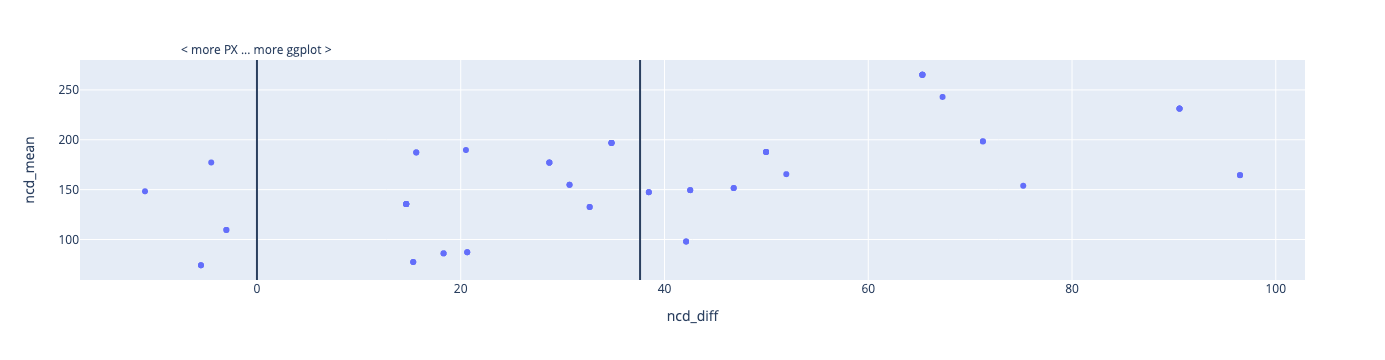

In [21]:
px.scatter(merged, y="ncd_mean", x="ncd_diff",
           hover_data=merged.columns
          ).add_vline(x=0, annotation_text="< more PX ... more ggplot >", annotation_position="top").add_vline(
    x=merged.ncd_diff.mean())

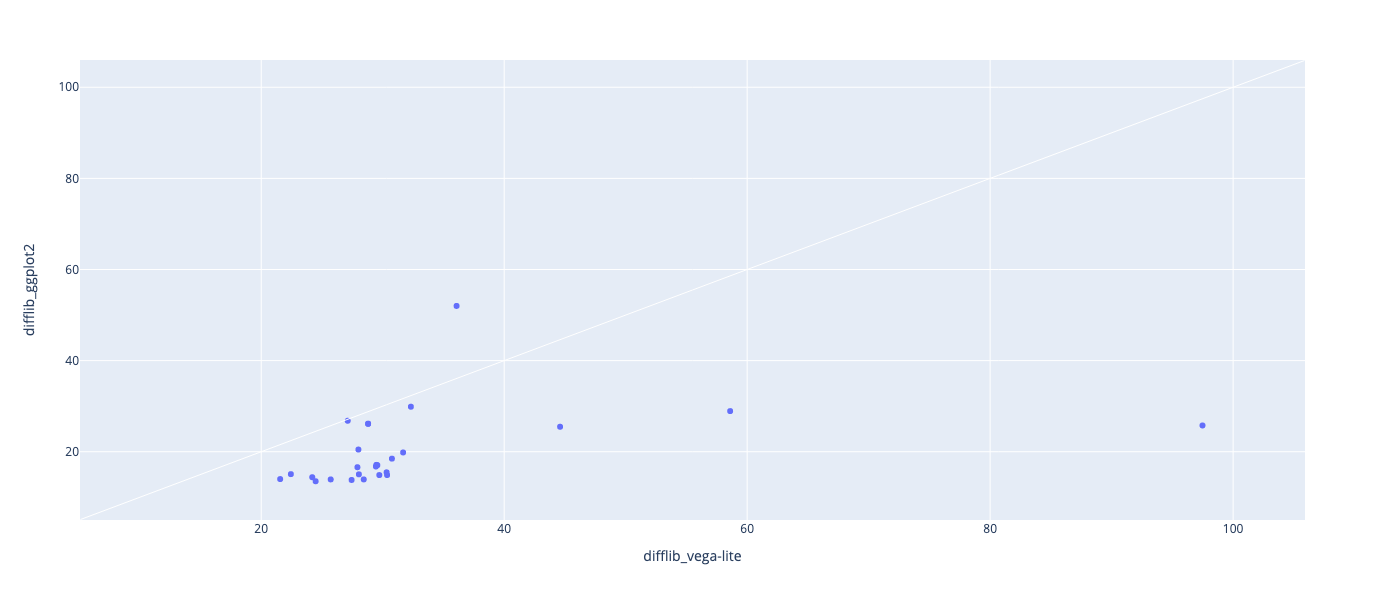

In [23]:
from src.distances import load_distances
import plotly.express as px
import pandas as pd


df = load_distances()

study = "movies"

notation1 = "vega-lite"
notation2 = "ggplot2"
distance1 = "difflib"
distance2 = "difflib"

merged = pd.merge(df.query(f"study=='{study}' and notation=='{notation1}'")[["from_slug", "to_slug", distance1]], 
                  df.query(f"study=='{study}' and notation=='{notation2}'")[["from_slug", "to_slug", distance2]], 
                  on=["from_slug", "to_slug"], suffixes=["_" + notation1, "_"+ notation2])

x= distance1+"_"+notation1
y= distance2+"_"+notation2
merged = merged.groupby("from_slug").mean([x,y]).reset_index()

fig = px.scatter(merged, x=x, y=y,
                 hover_data=merged.columns, width=600, height=600)

if distance1 == distance2:
    the_min = min(merged[x].min(), merged[y].min())
    the_max = max(merged[x].max(), merged[y].max())
    stretch = 0.1*(the_max-the_min)
    fig.add_shape(type="line", line=dict(color="white", width=1),
                  x0=the_min-stretch, y0=the_min-stretch,
                  x1=the_max+stretch, y1=the_max+stretch)
fig

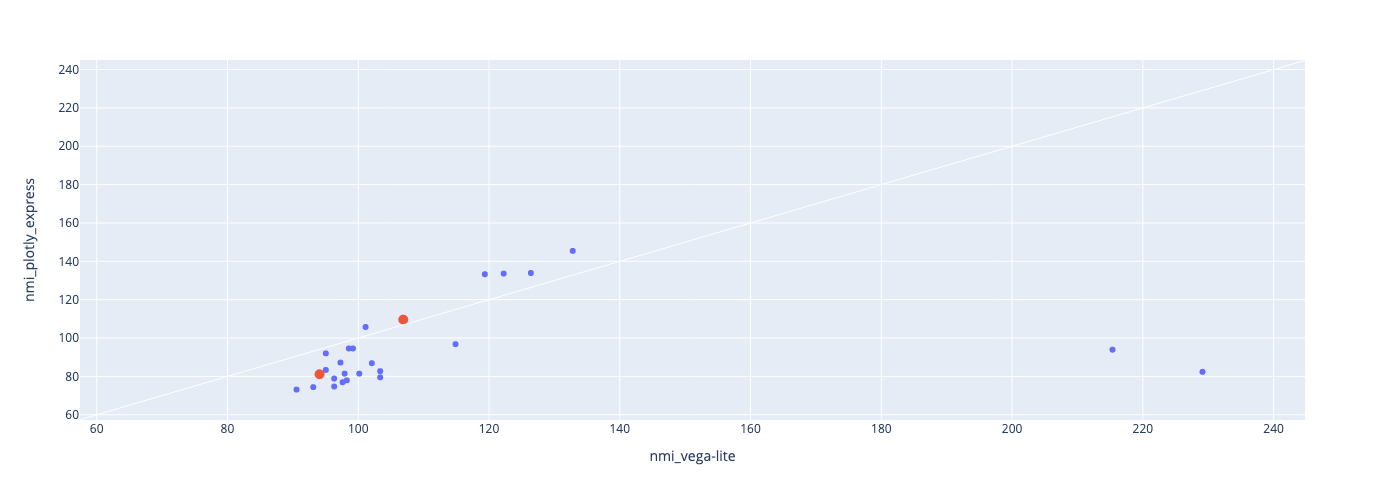

In [24]:
from src import vis_types, ext, get_distance, distance_types, get_vis, merged_distances
import plotly.express as px
import pandas as pd
import numpy as np
import statsmodels.api as sm

def cross_notation_figure(study, notation, distance, notation2, distance2, from_slug, to_slug):

    merged = merged_distances(study, notation, distance, notation2, distance2)

    x = distance
    y = distance2
    if notation != notation2:
        x += "_" + notation
        y += "_" + notation2
        
    merged = merged.groupby("from_slug").mean([x,y]).reset_index()
    merged["selected"] = (merged["from_slug"] == from_slug) | (merged["from_slug"] == to_slug)

    fig = px.scatter(merged, x=x, y=y, hover_name="from_slug", color="selected", 
                     hover_data={x: False, y: False, "selected": False}, 
                     width=500, height=500)
    fig.update_layout(showlegend=False)
    if len(fig.data) > 1:
        fig.data[1].marker.size = 10
        
    
    if distance == distance2:
        the_min = min(merged[x].min(), merged[y].min())
        the_max = max(merged[x].max(), merged[y].max())
        stretch = 0.1 * (the_max - the_min)
        fig.add_shape(
            type="line", line=dict(color="white", width=1), x0=the_min - stretch, y0=the_min - stretch, x1=the_max + stretch, y1=the_max + stretch
        )
    return fig

cross_notation_figure("movies", "vega-lite", "nmi", "plotly_express", "nmi", "bar_count", "bubble_agg")